In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
import LibrairiePerso_v4_4 as ownLibrary
import seaborn as sns 
import numpy as np
import copy


In [72]:
path ='C:/Users/Julie/Documents/Big_Data/github/'

dataset = pd.read_csv(path + "train.csv", sep=",")
submission = pd.read_csv(path + "test.csv", sep=",")


In [73]:
len(dataset)

1460

In [74]:
pd.set_option('display.max_columns', 500)

## Split Train/Test

In [75]:
exp = list(dataset.columns.values)
exp.remove('SalePrice')
X = dataset[exp]
y = dataset['SalePrice']

X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.3 , 
                            random_state= 100 )

# Replacements

## Replacements for continuous features

In [76]:
X_train_MasVnrArea = X_train.groupby("Neighborhood")["MasVnrArea"].median().to_frame()
ownLibrary.replaceByGroupMedian([X_train, X_test, submission], X_train_MasVnrArea, "MasVnrArea", "Neighborhood")

X_train_LotFrontage = X_train.groupby("Neighborhood")["LotFrontage"].median().to_frame()
ownLibrary.replaceByGroupMedian([X_train, X_test, submission], X_train_LotFrontage, "LotFrontage", "Neighborhood")

for df in [X_train, X_test, submission]:   
        
    for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
        df[col] = df[col].fillna(0)       
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
        df[col] = df[col].fillna(0)
    for col in ('BsmtFullBath', 'BsmtHalfBath'):
        df[col] = df[col].fillna(0)


c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
for df in [X_train, X_test, submission]:
    df['GarageCars'] = df['GarageCars'].astype(int)
    df['BsmtFullBath'] = df['BsmtFullBath'].astype(int)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].astype(int)

c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

## Replacements for categorical features

In [78]:
for df in [X_train, X_test, submission]:
    df.Alley.fillna("eNA", inplace = True)
    df.BsmtCond.fillna("eNA", inplace = True)
    df.BsmtQual.fillna("eNA", inplace = True)
    df.BsmtExposure.fillna("eNA", inplace = True)
    df.BsmtFinType1.fillna("eNA", inplace = True)
    df.BsmtFinType2.fillna("eNA", inplace = True)
    df.FireplaceQu.fillna("eNA", inplace = True)
    df.GarageType.fillna("eNA", inplace = True)
    df.GarageFinish.fillna("eNA", inplace = True)
    df.GarageQual.fillna("eNA", inplace = True)
    df.GarageCond.fillna("eNA", inplace = True)
    df.Fence.fillna("eNA", inplace = True)
    df.MiscFeature.fillna("eNA", inplace = True)
    df.PoolQC.fillna("eNa", inplace = True)

In [79]:
# NA est une valeur manquant pour ces variables Qualitatives
# On remplace donc par la valeur la plus fréquente
for df in [X_train, X_test, submission]:
    df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
    df['Functional'].fillna(df['Functional'].mode()[0], inplace = True)
    df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
    df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)
    df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace = True)
    df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)
    df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace = True)
    df['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)

# Delete not used features

In [80]:
for df in [X_train, X_test, submission]:
    df.drop(['Utilities'], axis=1, inplace=True)
    df.drop(['Street'], axis=1, inplace=True)
    df.drop(['Condition2'], axis=1, inplace=True)
    df.drop(['RoofMatl'], axis=1, inplace=True)
    df.drop(['Heating'], axis=1, inplace=True)
    df.drop(['LowQualFinSF'], axis=1, inplace=True)
    df.drop(['3SsnPorch'], axis=1, inplace=True)
    df.drop(['PoolArea'], axis=1, inplace=True)
    df.drop(['PoolQC'], axis=1, inplace=True)
    #df.drop(['MiscVal'], axis=1, inplace=True)
    df.drop(['MiscFeature'], axis=1, inplace=True)
    #df.drop(['Neighborhood'], axis=1 , inplace=True)

## Extreme values correction

In [81]:
for df in [X_train, X_test, submission]:
    df['LotFrontage'].clip(lower=30, upper = 110, inplace = True)
    df['YearBuilt'].clip(lower=1885, inplace = True)
    df['MasVnrArea'].clip(upper = 700, inplace = True)
    df['TotalBsmtSF'].clip(105,2077, inplace = True)
    df['1stFlrSF'].clip(upper = 2223, inplace = True)
    df['GrLivArea'].clip(upper = 2728, inplace = True)
    df['GarageArea'].clip(upper = 936, inplace = True)
    df['GarageYrBlt'].clip(lower=1910, inplace = True)

## Correction of the target feature distribution

In [82]:
y_train = y_train + X_train['MiscVal']
y_test = y_test + X_test['MiscVal']

Skewness: 1.936395
Kurtosis: 7.344251


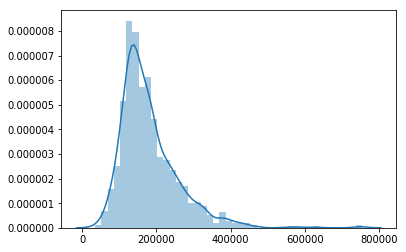

In [83]:
sns.distplot(y_train);
# skewness and kurtosis
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Skewness: 0.167602
Kurtosis: 0.688627


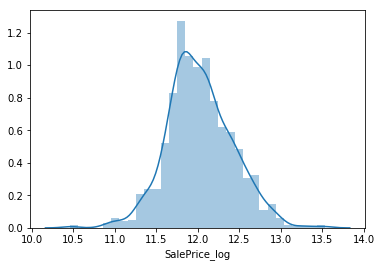

In [84]:
X_train['SalePrice_log'] = np.log(y_train)
X_test['SalePrice_log'] = np.log(y_test)

sns.distplot(X_train['SalePrice_log']);
# skewness and kurtosis
print("Skewness: %f" % X_train['SalePrice_log'].skew())
print("Kurtosis: %f" % X_train['SalePrice_log'].kurt())



## Scale Features

<p>
Available scale features methods
<ul>
<li>scaleMethod 0 : no scale</li>
<li>scaleMethod 1 : df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())</li>
<li>scaleMethod 2 : df[feature] = df[feature] / df[feature].max()</li>
<li>scaleMethod 3 : df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()</li>
<li>scaleMethod 4 : df = preprocessing.StandardScaler().fit(df[continuous_features]).transform(df[continuous_features])</li>
</ul>
</p>


In [88]:
continuous_features = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch', 'GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']

for df in ['X_train','X_test','submission']:
    df = ownLibrary.scale_features(df, continuous_features, scaleMethod = 0)
    
print(X_train.shape)
X_train.head(5)

(1022, 72)


Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape  \
210    211          30       RL         67.0     5604   eNA      Reg   
318    319          60       RL         90.0     9900   eNA      Reg   
239    240          50       RL         52.0     8741   eNA      Reg   
986    987          50       RM         59.0     5310   eNA      Reg   
1416  1417         190       RM         60.0    11340   eNA      Reg   

     LandContour LotConfig LandSlope Neighborhood Condition1 BldgType  \
210          Lvl    Inside       Gtl      Edwards       Norm     1Fam   
318          Low    Inside       Mod      NoRidge       Norm     1Fam   
239          Lvl    Inside       Gtl      Edwards       Norm     1Fam   
986          Lvl    Corner       Gtl      OldTown      Feedr     1Fam   
1416         Lvl    Inside       Gtl      OldTown       Norm   2fmCon   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
210      1Story            5            6       1925          1950     Gable   
318      2Story            7            5       1993          1993     Gable   
239      1.5Fin            6            4       1945          1950     Gable   
986      1.5Fin            6            8       1910          2003       Hip   
1416     2Story            4            6       1885          1950     Gable   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
210       Stucco      Stucco       None         0.0        TA        TA   
318      HdBoard     HdBoard    BrkFace       256.0        Gd        TA   
239      VinylSd     VinylSd       None         0.0        TA        TA   
986      VinylSd     VinylSd       None         0.0        TA        Gd   
1416     VinylSd     AsbShng       None         0.0        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
210      CBlock       TA       TA           No          Rec         468   
318       PConc       Gd       TA           Gd          GLQ         987   
239      CBlock       TA       Fa           No          LwQ          94   
986      CBlock       TA       Fa           No          Unf           0   
1416      PConc       TA       TA           No          Unf           0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  \
210           Unf           0        396          864        TA          N   
318           Unf           0        360         1347        Ex          Y   
239           Unf           0        641          735        TA          Y   
986           Unf           0        485          485        Gd          Y   
1416          Unf           0        777          777        Gd          Y   

     Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
210       FuseA       864         0        864             1             0   
318       SBrkr      1372      1274       2646             1             0   
239       FuseA       798       689       1487             0             0   
986       SBrkr      1001       634       1635             0             0   
1416      SBrkr      1246      1044       2290             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
210          1         0             2             1          TA   
318          2         1             4             1          Gd   
239          1         1             3             1          TA   
986          1         0             2             1          Gd   
1416         2         0             4             2          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
210              5        Typ           0         eNA        eNA       1910.0   
318              9        Typ           1          TA     Attchd       1993.0   
239              7        Typ           1          Gd     Detchd       1949.0   
986              5        Typ           0         eNA     Attchd       1950.0   
1

## Export

In [87]:
X_train['SalePrice'] = y_train
X_train.to_csv (path + "Initial_train_rwrk.csv", index = False, header=True)
X_test['SalePrice'] = y_test
X_test.to_csv (path + "Initial_test_rwrk.csv", index = False, header=True)

submission['SalePrice'] = 0
submission.to_csv (path + "Initial_submission_rwrk.csv", index = False, header=True)


c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\julie\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
